# Market Basket: case description

The manager of a grocery store asked for your help regarding the shelf layout of the shop. Until recently they
had about 200 SKUs (stock keeping units: unique item numbers), but the headquarter of the grocery chain
advised them to keep only 105 of them and introduce 64 new SKUs. The store manager is in charge of
where to place those items. You find the layout of the shop on the next page. The 105 existing items were
distributed evenly across the 7 shelves. In general everything can be changed, but the store manager
suggests to keep those 105 items at their current position, unless there are very strong reasons for an
alternative. Otherwise the customers could be even more confused than they will be anyway due to the
change.



You have been given sales data from a different shop that made the transition last year. The layout of this
shop is somewhat different, but you can get from the data, which items were purchased together and which
not.


Your task is to perform smart analysis with the data using Python code and come up with a good
recommendation for the store manager.

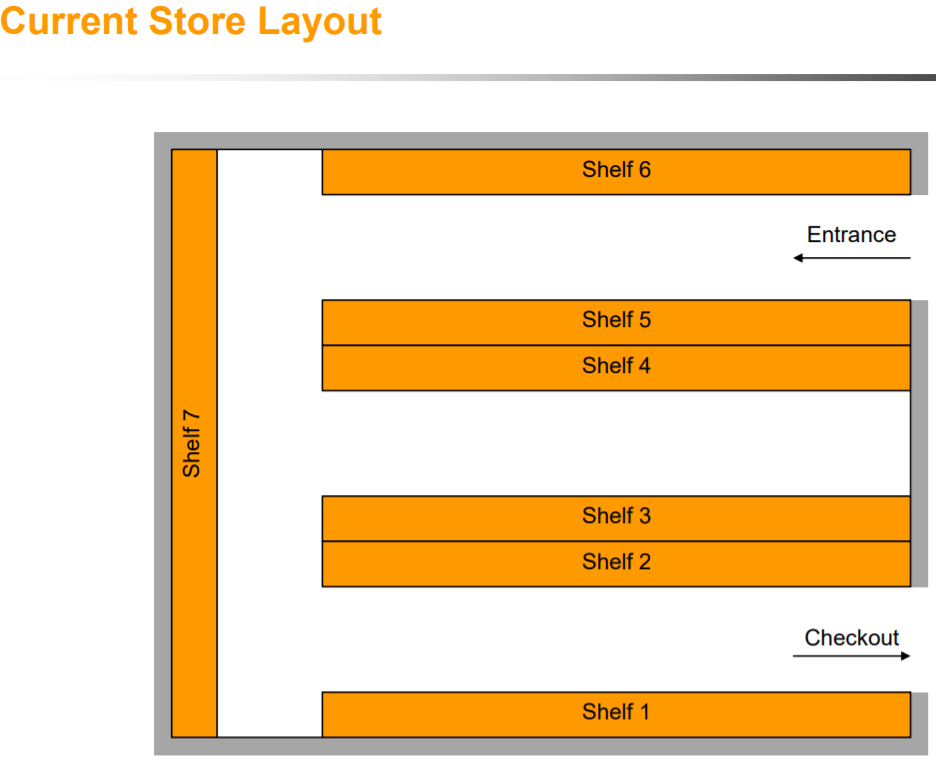![image.png]()

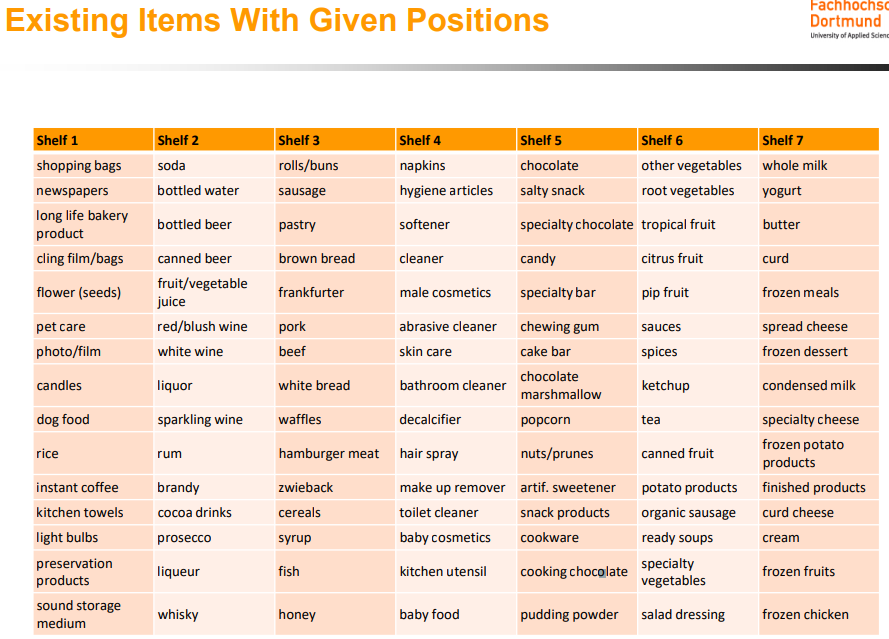

---

# Team solution

## Shelves distribution

1. **Shelf 6:**
1. **Shelf 5:**

* **Shelf 7:** frozen food

2. **Shelf 4:**
2. **Shelf 3:**

3. **Shelf 2:**
3. **Shelf 1:**

# Packages

In [1]:
import io
import requests
import pandas as pd
import numpy as np
from collections import OrderedDict

import matplotlib.pyplot as plt
%matplotlib inline

# Utils

In [2]:
def requests_csv(url, decode='utf-8'):
    '''Request the csv from the url

    :param url: url of the dataset
    :param decode: decode the dataset
    :return: requested url
    '''
    return (requests.get(url).content.decode(decode))

def load_dataset(url, sep=',', decode='utf-8', dtype=None, header=None):
    '''Requesting url dataset
    
    :param url: with the dataset
    :param sep: select the dataset separator
    :return: requested and decoded url
    '''
    return pd.read_csv(io.StringIO(requests_csv(url, decode)), sep=sep, dtype=dtype, header=header)

# Dataset

* 9835 rows
* Each row is a transaction (customer basket)
* The items purchased in each
row are separated by commas
* 169 unique items

## Load the dataset

In [3]:
raw_url = 'https://raw.githubusercontent.com/Y4rd13/ILIAS/main/datasets/W02_data_groceries.csv'
df = load_dataset(url=raw_url, sep='\t', header=None)

In [4]:
df

,0
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."
...,...
9830,"sausage,chicken,beef,hamburger meat,citrus fru..."
9831,cooking chocolate
9832,"chicken,citrus fruit,other vegetables,butter,y..."
9833,"semi-finished bread,bottled water,soda,bottled..."


## Some preprocessing

In [5]:
df.columns = ['transaction']
df['id'] = range(len(df))
df = df[['id', 'transaction']]

In [6]:
df.head(10)

,id,transaction
0,0,"citrus fruit,semi-finished bread,margarine,rea..."
1,1,"tropical fruit,yogurt,coffee"
2,2,whole milk
3,3,"pip fruit,yogurt,cream cheese,meat spreads"
4,4,"other vegetables,whole milk,condensed milk,lon..."
5,5,"whole milk,butter,yogurt,rice,abrasive cleaner"
6,6,rolls/buns
7,7,"other vegetables,UHT-milk,rolls/buns,bottled b..."
8,8,potted plants
9,9,"whole milk,cereals"


In [7]:
transaction_id = df['id'].values.tolist()
items_purchased = df['transaction'].values.tolist()
items_purchased = [i.split(',') for i in items_purchased]

d_data = dict(zip(transaction_id, items_purchased))

In [ ]:
d_data

In [9]:
list(d_data.values()).count((list(d_data.values())[0][:2]))

1

In [15]:
list(d_data.values())[0]

['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups']

In [13]:
(list(d_data.values())[0][:2])

['citrus fruit', 'semi-finished bread']

# Association rules

In [10]:
# Constants
N = len(df) # Number of transactions
UNIQUE_ITEMS = set([x for b in d_data.values() for x in b])
UNIQUE_ITEMS_LEN = len(UNIQUE_ITEMS)

In [ ]:
# itertools combinations + UNIQUE_ITEMS
# support x -> y : .count([x, y])
# dictionary with frequency of the items
# get from the dict_freq, the most frequent items

In [ ]:
#UNIQUE_ITEMS --> combinations of two (X --> Y) --> store every combination into a dictionary --> key: 'first combination', value: [10] --> {'first': 10} --> top 10 frequency items